In [130]:
import numpy as np

In [131]:
class _LinearRegression:
    def __init__(self, X, y, w, n_iters=1e6, eta=1e-2, eps=1e-3):
        self.X = X
        self.y = y
        self.w = w
        self.n_iters=n_iters
        self.eta=eta
        self.eps = eps
        
    def _sgd_step(self, ind):
        x = self.X[ind]
        grad = np.zeros(self.w.shape)
        feat_weight_sum = np.sum(x * self.w)
        
        for i in range(len(grad)):
            grad[i] = x[i] * (feat_weight_sum - self.y[ind])
            
        return (2 * self.eta / self.X.shape[0]) * grad
    
    def _mse_error(self):
        return np.sum((np.dot(self.X, self.w.T) - self.y)**2)
    
    def _sgd(self):
        errors = []
        _iter = 0
        _eps = np.inf
        
        while _iter < self.n_iters or _eps > self.eps:
            ind = np.random.randint(self.X.shape[0])
            
            w_old = self.w
            self.w = w_old - self._sgd_step(ind)
            _eps = np.linalg.norm(w_old - self.w)
            
            _iter += 1
            errors.append(self._mse_error())
            
        return self.w, errors, _iter
        
    def predict(self, X_test, weights):
        return np.dot(X_test, weights.T)

In [132]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

In [133]:
data = np.hstack((data, np.ones((data.shape[0], 1))))
print(data.shape)

w = np.zeros(data.shape[1])
print(w)

(150, 5)
[0. 0. 0. 0. 0.]


In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [135]:
_lr_model = _LinearRegression(X_train, y_train, w)
weights, errors, iterations = _lr_model._sgd()

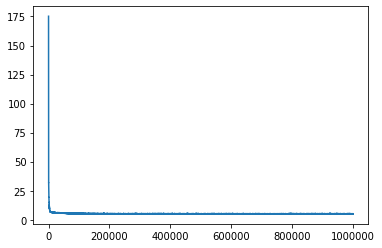

In [136]:
import matplotlib.pyplot as plt

plt.plot(range(iterations), errors);

In [137]:
from sklearn.metrics import mean_squared_error as mse

y_pred = _lr_model.predict(X_test, weights)
custom_model_mse = mse(y_test, y_pred)
print(custom_model_mse)

0.04761799554380045


In [138]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

sklearn_model_mse = mse(y_test, y_pred)
print(sklearn_model_mse)

0.04606337166622676
